## Chronology-controlled experiments

We clearly see in general semantic halo model, that similarities/dissimilarties between meters are at least partly driven by chronolgy. We have ~200 years of Russian poetry, and themes are not equally distributed over this time, they emerge and dissappear, 19th language is easily distinguishable from 20th century language and model exploits it.

To control for chronology, we built another topic model using only 19th century texts, which had date of creation annotations. 

In [1]:
library(topicmodels)
library(tidyverse)
library(tidytext)
#dendrograms
library(ape)
library(phylogram)
library(ggdendro)
library(phangorn)
#calculations
library(proxy)
library(ineq)
#visuals
library(paletteer)
library(ggrepel)
library(plotly)
library(hrbrthemes)
library(DT)
library(grid)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.3
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘proxy’


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is

## 0. Preparations


In [3]:
## set years of period span 
period_span = 30

In [5]:
load("data/lda_output.rda")
#drop NA poems


### pull list of unique poems for later sampling

unique_poems_period = unique_poems  %>% 
    mutate(period = floor(as.numeric(year)/period_span)*period_span)  %>% 
    filter(period >= 1740)  %>% 
    mutate(period = case_when(period < 1800 ~ 1770,
                              TRUE ~ period))
 #   mutate(chunk = id,
 #          id = chunk,
 #          id = str_replace_all(id, "-.*", ""))



### get count of meters
meter_counts_period = unique_poems  %>% 
    mutate(period = floor(as.numeric(year)/period_span)*period_span)  %>% 
    filter(period >= 1740)  %>% 
    mutate(period = case_when(period < 1800 ~ 1770,
                              TRUE ~ period))  %>% 

    count(meter,period,  sort=T)  %>% 
    filter(!str_detect(meter,"NA"))


### get count of metrical forms (meter + clausula)
meter_claus_period = unique_poems_period  %>% 
    mutate(period = floor(as.numeric(year)/period_span)*period_span)  %>% 
    filter(period >= 1740)  %>% 
    mutate(period = case_when(period < 1800 ~ 1770,
                              TRUE ~ period))  %>% 
    filter(!str_detect(meter,"NA_"))


unique_poems_period
head(ru_gamma_separated)
head(meter_claus_period)
head(meter_count_period)


id,author,year,meter,clausula,period
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,В.И.Майков,1767,Явольн,вольн,1770
2,В.И.Майков,1767,Я6,жжмм,1770
3,В.И.Майков,1767,Явольн,вольн,1770
4,В.И.Майков,1773,Х4,мж,1770
5,В.И.Майков,1767,Я6,"ж,м",1770
6,В.И.Майков,1777,Я6,ммжж,1770
7,В.И.Майков,1773,Я6,жжмм,1770
8,В.И.Майков,1773,Я6,"ж,м",1770
9,В.И.Майков,1776,NA,NA,1770


id,author,year,meter,clausula,topic,gamma,label
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>
1,В.И.Майков,1767,Явольн,вольн,1,0.014864865,1_звезда мир небо земля бездна
2,В.И.Майков,1767,Я6,жжмм,1,0.002173913,1_звезда мир небо земля бездна
3,В.И.Майков,1767,Явольн,вольн,1,0.001639344,1_звезда мир небо земля бездна
4,В.И.Майков,1773,Х4,мж,1,0.001020408,1_звезда мир небо земля бездна
5,В.И.Майков,1767,Я6,"ж,м",1,0.002173913,1_звезда мир небо земля бездна
6,В.И.Майков,1777,Я6,ммжж,1,0.070000000,1_звезда мир небо земля бездна


id,author,year,meter,clausula,period
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,В.И.Майков,1767,Явольн,вольн,1770
2,В.И.Майков,1767,Я6,жжмм,1770
3,В.И.Майков,1767,Явольн,вольн,1770
4,В.И.Майков,1773,Х4,мж,1770
5,В.И.Майков,1767,Я6,"ж,м",1770
6,В.И.Майков,1777,Я6,ммжж,1770


ERROR: Error in head(meter_count_period): object 'meter_count_period' not found


In [16]:
meters_in_periods = meter_counts_period  %>% 
 group_by(period)  %>% 
 top_n(6, n)  %>% 
 group_split()
meters_in_periods

meter,period,n
<chr>,<dbl>,<int>
Явольн,1770,306
Я6,1770,297
Я4,1770,192
Х4,1770,191
Я3,1770,93
С8,1770,9
Я6Я3,1770,9
meter,period,n
<chr>,<dbl>,<int>


In [6]:
source("src//test_clusters_halo.R")
source("src//poem_sampler.R")
slide_df=c()
periods= meter_counts_period  %>% select(period) %>% arrange(period) %>% unique()  %>% pull()
periods=periods[-1]

for (i in 1:length(periods)) {

meters_per_i = meter_counts_period  %>% filter(period==periods[i])  %>% top_n(6,n)

halo_clusters = test_clusters_halo(poem_list=unique_poems_period %>% filter(period==periods[i]),
                                   meter_list=meters_per_i,
                         p_size=floor(min(meters_per_i$n)/20)*10,
                         samples_per_meter=2,
                         iterations=100,
                         min_meter_count=-Inf,
                         max_meter_count=Inf,
                         rep=FALSE)  %>% 
    select(-poems_per_sample)  %>% 
    mutate(window_start=periods[i])

slide_df = slide_df  %>% bind_rows(halo_clusters)

}


[1] "Now at 30 poems"


Registered S3 methods overwritten by 'registry':
  method               from 
  print.registry_field proxy
  print.registry_entry proxy



[1] "Now at 50 poems"
[1] "Now at 30 poems"
[1] "Now at 270 poems"
[1] "Now at 250 poems"


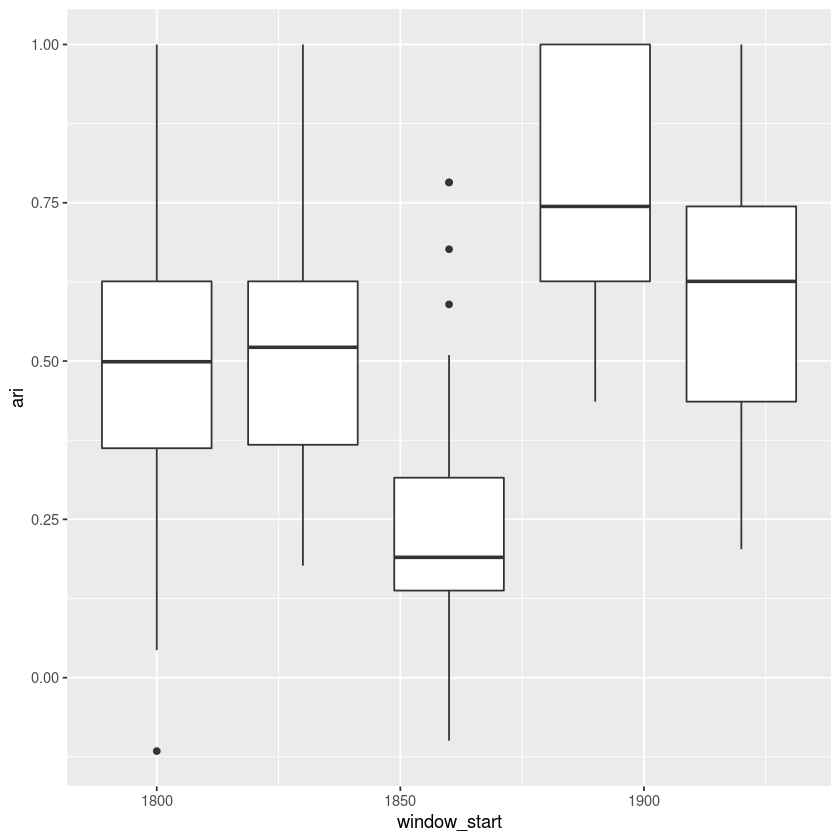

In [7]:
slide_df  %>% ggplot(aes(window_start, ari, group=window_start)) + geom_boxplot()

In [8]:
slide_df  %>% group_by(window_start)  %>% summarise(m_ari = mean(ari))

window_start,m_ari
<dbl>,<dbl>
1800,0.4852786
1830,0.5119603
1860,0.2297275
1890,0.7792664
1920,0.6106830


## Two halves of an apple (1800-1850 vs. 1850-1900)

### Recalculate data for 50-year spans

In [2]:
## set years of period span 
period_span = 50

In [3]:
load("data/lda_output.rda")
#drop NA poems


### pull list of unique poems for later sampling

unique_poems_period = unique_poems  %>% 
    mutate(period = floor(as.numeric(year)/period_span)*period_span)  %>% 
    filter(period >= 1800 & period < 1900) 
   #   mutate(chunk = id,
 #          id = chunk,
 #          id = str_replace_all(id, "-.*", ""))



### get count of meters
meter_counts_period = unique_poems  %>% 
    mutate(period = floor(as.numeric(year)/period_span)*period_span)  %>% 
    filter(period >= 1800 & period < 1900)  %>% 
  
    count(meter,period,  sort=T)  %>% 
    filter(!str_detect(meter,"NA"))


### get count of metrical forms (meter + clausula)
meter_claus_period = unique_poems_period  %>% 
    mutate(period = floor(as.numeric(year)/period_span)*period_span)  %>% 
    filter(period >= 1800 & period < 1900)  %>%
    filter(!str_detect(meter,"NA_"))


unique_poems_period
head(ru_gamma_separated)
head(meter_claus_period)
head(meter_count_period)


id,author,year,meter,clausula,period
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
59,М.Н.Муравьев,1802,Я6,мж,1800
74,М.Н.Муравьев,1802,Я3,ммж,1800
80,М.Н.Муравьев,1802,Я6,жм,1800
139,М.Н.Муравьев,1804,Х4жмХ3ж,Х4жм Х3ж,1800
443,Ю.А.Нелединский-Мелецкий,1808,Я4,жм,1800
464,Ю.А.Нелединский-Мелецкий,1808,Явольн,вольн,1800
466,Ю.А.Нелединский-Мелецкий,1808,Х4,"ж,м",1800
471,П.А.Пельский,1803,Х4,жм,1800
479,П.А.Пельский,1803,Я4,"ж,м",1800


id,author,year,meter,clausula,topic,gamma,label
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>
1,В.И.Майков,1767,Явольн,вольн,1,0.014864865,1_звезда мир небо земля бездна
2,В.И.Майков,1767,Я6,жжмм,1,0.002173913,1_звезда мир небо земля бездна
3,В.И.Майков,1767,Явольн,вольн,1,0.001639344,1_звезда мир небо земля бездна
4,В.И.Майков,1773,Х4,мж,1,0.001020408,1_звезда мир небо земля бездна
5,В.И.Майков,1767,Я6,"ж,м",1,0.002173913,1_звезда мир небо земля бездна
6,В.И.Майков,1777,Я6,ммжж,1,0.070000000,1_звезда мир небо земля бездна


id,author,year,meter,clausula,period
<int>,<chr>,<chr>,<chr>,<chr>,<dbl>
59,М.Н.Муравьев,1802,Я6,мж,1800
74,М.Н.Муравьев,1802,Я3,ммж,1800
80,М.Н.Муравьев,1802,Я6,жм,1800
139,М.Н.Муравьев,1804,Х4жмХ3ж,Х4жм Х3ж,1800
443,Ю.А.Нелединский-Мелецкий,1808,Я4,жм,1800
464,Ю.А.Нелединский-Мелецкий,1808,Явольн,вольн,1800


ERROR: Error in head(meter_count_period): object 'meter_count_period' not found


### Determine eligible meters shared across periods

In [4]:
meters_in_periods = meter_counts_period  %>% 
 group_by(period)  %>% 
 top_n(10, n)  %>% 
 filter(n > 80)  %>% 
 group_split()
meters_in_periods

meter,period,n
<chr>,<dbl>,<int>
Я4,1800,1483
Х4,1800,649
Явольн,1800,610
Я6,1800,366
Я5,1800,321
Я3,1800,113
Аф4,1800,88
meter,period,n
<chr>,<dbl>,<int>


In [5]:
eligible_meters = intersect(meters_in_periods[[1]]$meter, meters_in_periods[[2]]$meter)


meter_count_rolling = meter_counts_period  %>% 
    filter(meter %in% eligible_meters)  %>% 
    group_by(meter)  %>% 
    summarise(n =sum(n))  %>% 
    ungroup()


eligible_meters

[1] "Я4"     "Х4"     "Явольн" "Я6"     "Я5"     "Аф4"

### Iterative clustering per period

In [6]:
source('src/test_clusters_halo.R')
source('src/poem_sampler.R')
slide_df = c()
periods = c(1800,1850)
for (i in 1:length(periods)) {
    

halo_clusters = test_clusters_halo(poem_list=unique_poems_period  %>% filter(period==periods[i]),
                                   meter_list=meter_count_rolling,
                         p_size=40,
                         samples_per_meter=2,
                         iterations=1000,
                         min_meter_count=-Inf,
                         max_meter_count=Inf,
                         rep=FALSE)  %>% 
    select(-poems_per_sample)  %>% 
    mutate(window_start=periods[i])

slide_df = slide_df  %>% bind_rows(halo_clusters)

}


[1] "Now at 40 poems"


Registered S3 methods overwritten by 'registry':
  method               from 
  print.registry_field proxy
  print.registry_entry proxy



[1] "Now at 40 poems"


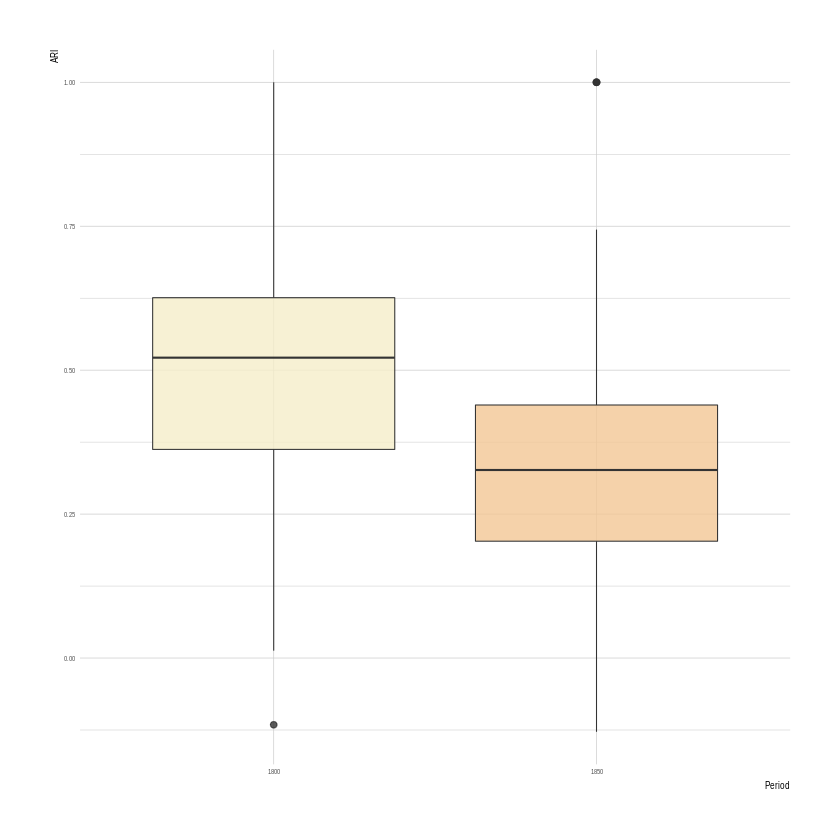

In [7]:
slide_df  %>% ggplot(aes(as.character(window_start), ari, group=window_start, fill=as.character(window_start))) + geom_boxplot(alpha=0.8,size=0.3) +
theme_ipsum() + labs(x="Period", y="ARI") + theme(axis.title.x = element_text(size=12),
                                                  axis.title.y = element_text(size=12),
                                                  axis.text.x=element_text(size=10),
                                                  axis.text.y=element_text(size=10)) + scale_fill_paletteer_d("ghibli::MononokeLight",direction = -1) + guides(fill=F)

In [9]:
ggsave("plots/fig4_periods.png", width = 6, height = 4)

In [10]:
ari_1800 = slide_df  %>% filter(window_start==1800)  %>% pull(ari)
ari_1850 = slide_df  %>% filter(window_start==1850)  %>% pull(ari)

t.test(ari_1800, ari_1850)


	Welch Two Sample t-test

data:  ari_1800 and ari_1850
t = 20.154, df = 1998, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1481301 0.1800671
sample estimates:
mean of x mean of y 
0.4927642 0.3286656 


In [45]:
as.integer(2.2e-16)

[1] 0

### Increased sample size for 1850s

In [47]:
halo_clusters = test_clusters_halo(poem_list=unique_poems_period  %>% filter(period==periods[2]),
                                   meter_list=meter_counts_period  %>% filter(period==1850, n>=200) ,
                         p_size=100,
                         samples_per_meter=2,
                         iterations=100,
                         min_meter_count=-Inf,
                         max_meter_count=Inf,
                         rep=FALSE)  %>% 
    select(-poems_per_sample)  %>% 
    mutate(window_start=periods[i])

slide_df = slide_df  %>% bind_rows(halo_clusters)

[1] "Now at 100 poems"
